In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

Your runtime has 54.8 gigabytes of available RAM



In [ ]:
# !pip install -r requirements.txt
!pip install descartes
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 39.1 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/IGLC_Capstone')
%cd /content/drive/MyDrive/IGLC_Capstone

/content/drive/MyDrive/IGLC_Capstone


In [ ]:
from scripts.dataset.dataset5 import get_data, get_dataloaders
from scripts.model.model import model1
from scripts.train.train import train
from agsi import FarmData
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import rasterio
from rasterio.plot import show
from PIL import Image
import geopandas as gpd
from skimage import exposure
import os
raster_path = "/content/drive/MyDrive/IGLC_Capstone/data/test_farm/img/21_6/37/Orthomosaic.data.tif"

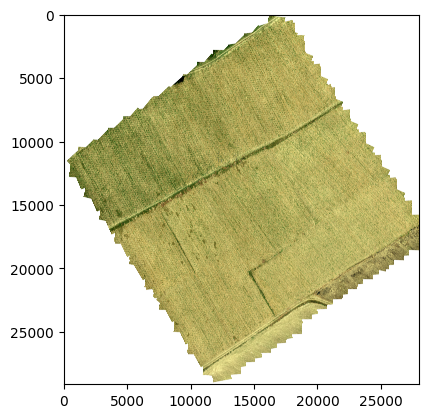

In [ ]:
# Open the TIFF file
with rasterio.open('/content/drive/MyDrive/Orthomosaic.rgb.tif') as dataset:
    # Read the image data as a numpy array
    image_data = dataset.read()
    # Plot the image
    show(image_data)

In [ ]:
sizeOfPatch = 32
curr_path = os.getcwd()
# curr_path = '/content/drive/MyDrive/IGLC_Capstone/'
# data3band = get_data(num_bands=3,stride_ratio=1,samples=3000,size=sizeOfPatch,farm_csv_path= os.path.join(curr_path, './data/farm.csv'),block_csv_path= os.path.join(curr_path, './data/block.csv'))
# data5band = get_data(num_bands=5,stride_ratio=0.35,samples=100000,size=sizeOfPatch,farm_csv_path= os.path.join(curr_path, './data/farm1.csv'),block_csv_path= os.path.join(curr_path, './data/block1.csv'))
# dataset= data5band.copy()
# dataset.to_pickle('/content/drive/MyDrive/dataset.pkl')
df = pd.read_pickle('/content/drive/MyDrive/dataset.pkl')

In [ ]:
df

,type,chip_cord_0,chip_cord_1,chip_cord_2,chip_cord_3,block,chip,name,type_name
0,1,22,54,396,428,B1_P1,"[[[0.023026599, 0.0249754, 0.026247537, 0.0260...",HW_LN,HW_LN
1,1,22,54,407,439,B1_P1,"[[[0.016220052, 0.017935053, 0.017924514, 0.01...",HW_LN,HW_LN
2,1,22,54,418,450,B1_P1,"[[[0.02027587, 0.021329222, 0.021899527, 0.021...",HW_LN,HW_LN
3,1,33,65,385,417,B1_P1,"[[[0.016656933, 0.020719536, 0.024053702, 0.02...",HW_LN,HW_LN
4,1,33,65,396,428,B1_P1,"[[[0.02388704, 0.025690503, 0.028464105, 0.026...",HW_LN,HW_LN
...,...,...,...,...,...,...,...,...,...
202844,3,847,879,286,318,B3_R5a,"[[[0.017104346, 0.01764413, 0.017523725, 0.019...",LW_HN,LW_HN
202845,3,847,879,297,329,B3_R5a,"[[[0.013357418, 0.013811426, 0.014541717, 0.01...",LW_HN,LW_HN
202846,3,858,890,253,285,B3_R5a,"[[[0.028795283, 0.029243596, 0.027230985, 0.02...",LW_HN,LW_HN
202847,3,858,890,264,296,B3_R5a,"[[[0.016575634, 0.015353283, 0.01620938, 0.017...",LW_HN,LW_HN


<Axes: xlabel='chip_cord_3', ylabel='Count'>

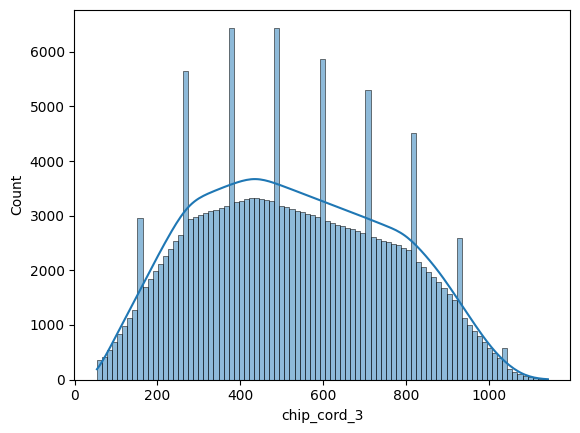

In [ ]:
import seaborn as sns
sns.histplot(df.chip_cord_3, kde=True)

In [ ]:
df1 = pd.read_pickle('/content/drive/MyDrive/datasetstride1.pkl')
df1

,type,chip_cord_0,chip_cord_1,chip_cord_2,chip_cord_3,block,chip,name,type_name
0,1,32,64,384,416,B1_P1,"[[[0.014558296, 0.016372126, 0.01954934, 0.023...",HW_LN,HW_LN
1,1,32,64,416,448,B1_P1,"[[[0.01722804, 0.016303018, 0.016123949, 0.017...",HW_LN,HW_LN
2,1,64,96,320,352,B1_P1,"[[[0.024940707, 0.023633692, 0.019221503, 0.01...",HW_LN,HW_LN
3,1,64,96,352,384,B1_P1,"[[[0.017747391, 0.01895493, 0.019202383, 0.017...",HW_LN,HW_LN
4,1,64,96,384,416,B1_P1,"[[[0.025362661, 0.023228647, 0.02203381, 0.017...",HW_LN,HW_LN
...,...,...,...,...,...,...,...,...,...
23972,3,800,832,352,384,B3_R5a,"[[[0.01528546, 0.014670707, 0.015083509, 0.016...",LW_HN,LW_HN
23973,3,800,832,384,416,B3_R5a,"[[[0.017855538, 0.017041352, 0.016730916, 0.01...",LW_HN,LW_HN
23974,3,832,864,256,288,B3_R5a,"[[[0.032403577, 0.032148257, 0.02928655, 0.026...",LW_HN,LW_HN
23975,3,832,864,288,320,B3_R5a,"[[[0.014115178, 0.013761467, 0.014049354, 0.01...",LW_HN,LW_HN


In [ ]:
df1.chip.loc[0].shape

(5, 32, 32)

<Axes: xlabel='chip_cord_2', ylabel='Count'>

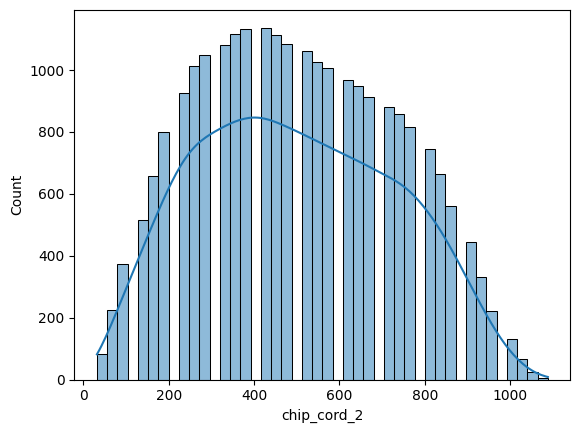

In [ ]:
sns.histplot(df1.chip_cord_2, kde=True)

In [ ]:
farm_csv_path = "/content/drive/MyDrive/IGLC_Capstone/data/farm1.csv"
block_csv_path = "/content/drive/MyDrive/IGLC_Capstone/data/block1.csv"

def convert_path(path):
    return path

if os.name == "posix":
    farm_csv_path = convert_path(farm_csv_path)
    block_csv_path = convert_path(block_csv_path)

all_data = FarmData(farm_csv_path,block_csv_path)
vikram_farm = all_data.farms['3']
vikram_farm.info
vikram_farm.get_modalities_for_times('22/06/23')
import pandas as pd
block_names = pd.read_csv(block_csv_path)['shp'].unique()
# extract 5 after splitting
block_namess = [block_name.split('/')[5] for block_name in block_names]
block_namess = [block_name.split('.')[0] for block_name in block_namess]
# block_namess
raster = vikram_farm.get_modality(modality_type='drone_37',timestamp='22/06/23')

In [ ]:
df_blocks = pd.read_csv('/content/drive/MyDrive/IGLC_Capstone/data/block1.csv')
df_blocks

,block_id,farm_id,block_name,timestamp,vegetation_type,crop_name,bounding_boxes,yield,shp,drone_18,drone_37,drone_75,sat_sentinel2,sat_planet,water_stress_gt
0,1,3,B1_P1,22/06/23,plant,NaN,NaN,NaN,./data/test_farm/shp/TestFarm/B1_P1.shp,NaN,./data/test_farm/img/21_6/37/Orthomosaic.data.tif,NaN,NaN,NaN,/filecontainingsegments_and_labels
1,2,3,B1_P2,22/06/23,plant,NaN,NaN,NaN,./data/test_farm/shp/TestFarm/B1_P2.shp,NaN,./data/test_farm/img/21_6/37/Orthomosaic.data.tif,NaN,NaN,NaN,NaN
2,3,3,B1_P3,22/06/23,plant,NaN,NaN,NaN,./data/test_farm/shp/TestFarm/B1_P3.shp,NaN,./data/test_farm/img/21_6/37/Orthomosaic.data.tif,NaN,NaN,NaN,overwrites farm level definition
3,4,3,B1_P4,22/06/23,plant,NaN,NaN,NaN,./data/test_farm/shp/TestFarm/B1_P4.shp,NaN,./data/test_farm/img/21_6/37/Orthomosaic.data.tif,NaN,NaN,NaN,NaN
4,5,3,B1_R1,22/06/23,plant,NaN,NaN,NaN,./data/test_farm/shp/TestFarm/B1_R1.shp,NaN,./data/test_farm/img/21_6/37/Orthomosaic.data.tif,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,3,B3_Y3a,22/06/23,plant,NaN,NaN,NaN,./data/test_farm/shp/TestFarm/B3_Y3a.shp,NaN,./data/test_farm/img/21_6/37/Orthomosaic.data.tif,NaN,NaN,NaN,NaN
58,59,3,B3_Y4,22/06/23,plant,NaN,NaN,NaN,./data/test_farm/shp/TestFarm/B3_Y4.shp,NaN,./data/test_farm/img/21_6/37/Orthomosaic.data.tif,NaN,NaN,NaN,NaN
59,60,3,B3_Y4a,22/06/23,plant,NaN,NaN,NaN,./data/test_farm/shp/TestFarm/B3_Y4a.shp,NaN,./data/test_farm/img/21_6/37/Orthomosaic.data.tif,NaN,NaN,NaN,NaN
60,61,3,B3_Y5,22/06/23,plant,NaN,NaN,NaN,./data/test_farm/shp/TestFarm/B3_Y5.shp,NaN,./data/test_farm/img/21_6/37/Orthomosaic.data.tif,NaN,NaN,NaN,NaN


In [ ]:
import math
def get_chips_cords(raster, size_chips, ratio = 0.5):
    raster = raster.read()
    # Get the number of planes, rows and columns of the raster
    no_planes, no_rows, no_cols = raster.shape[0], raster.shape[1], raster.shape[2]
    rows_per_chip = cols_per_chip = size_chips
    # Get the chips
    num_chips_col = no_cols // cols_per_chip
    num_chips_row = no_rows // rows_per_chip
    coords = []
    for i in range(num_chips_row):
        for j in range(num_chips_col):
            chip = raster[:, i * rows_per_chip : (i+1) * rows_per_chip, j * cols_per_chip : (j+1) * cols_per_chip]
            if (np.mean(chip[5,:,:]/255)) > ratio:
                # print(np.mean(chip))
                if np.mean(chip[5,:,:]/255) == 0:
                    print("0 error")
                coords.append((i * rows_per_chip , (i+1) * rows_per_chip, j * cols_per_chip , (j+1) * cols_per_chip))
    return coords

import random
def get_samples(num_of_samples, raster, size_chips, ratio = 0.5):
    cords = get_chips_cords(raster, size_chips, ratio)
    if len(cords) > num_of_samples:
        sample = random.sample(cords, num_of_samples)
    sample = cords
    list_raster = []
    for i in sample:
        chip = raster.read()
        # print(i)
        chip = chip[:, i[0]:i[1], i[2]:i[3]]
        list_raster.append(chip)
    return list_raster

(6, 12278, 11388)


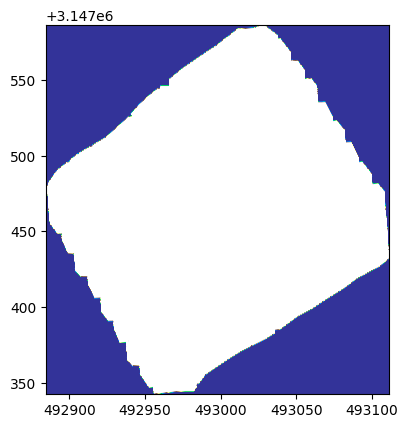

<Axes: >

In [ ]:
shape_file = '/content/drive/MyDrive/IGLC_Capstone/data/test_farm/shp/TestFarm/B1_P1.shp'
raster_file = '/content/drive/MyDrive/IGLC_Capstone/data/test_farm/img/21_6/37/Orthomosaic.data.tif'

# Read raster_file
raster_blockk = rasterio.open(raster_file)

# Read shape_file
shape_block = gpd.read_file(shape_file)

# Extract shape from raster
raster_block = raster_blockk.read()

# Extract shape from shape_file
shape_block = shape_block.geometry[0]

# Apply contrast stretching to the first band of the image
p2, p98 = np.percentile(raster_block[4,:,:], (2, 98))
raster_block_rescale = exposure.rescale_intensity(raster_block[4,:,:], in_range=(p2, p98))

# Print shape of raster_block and show the contrast-stretched image
print(raster_block.shape)
show(raster_block_rescale, transform=raster_blockk.transform, cmap='terrain')

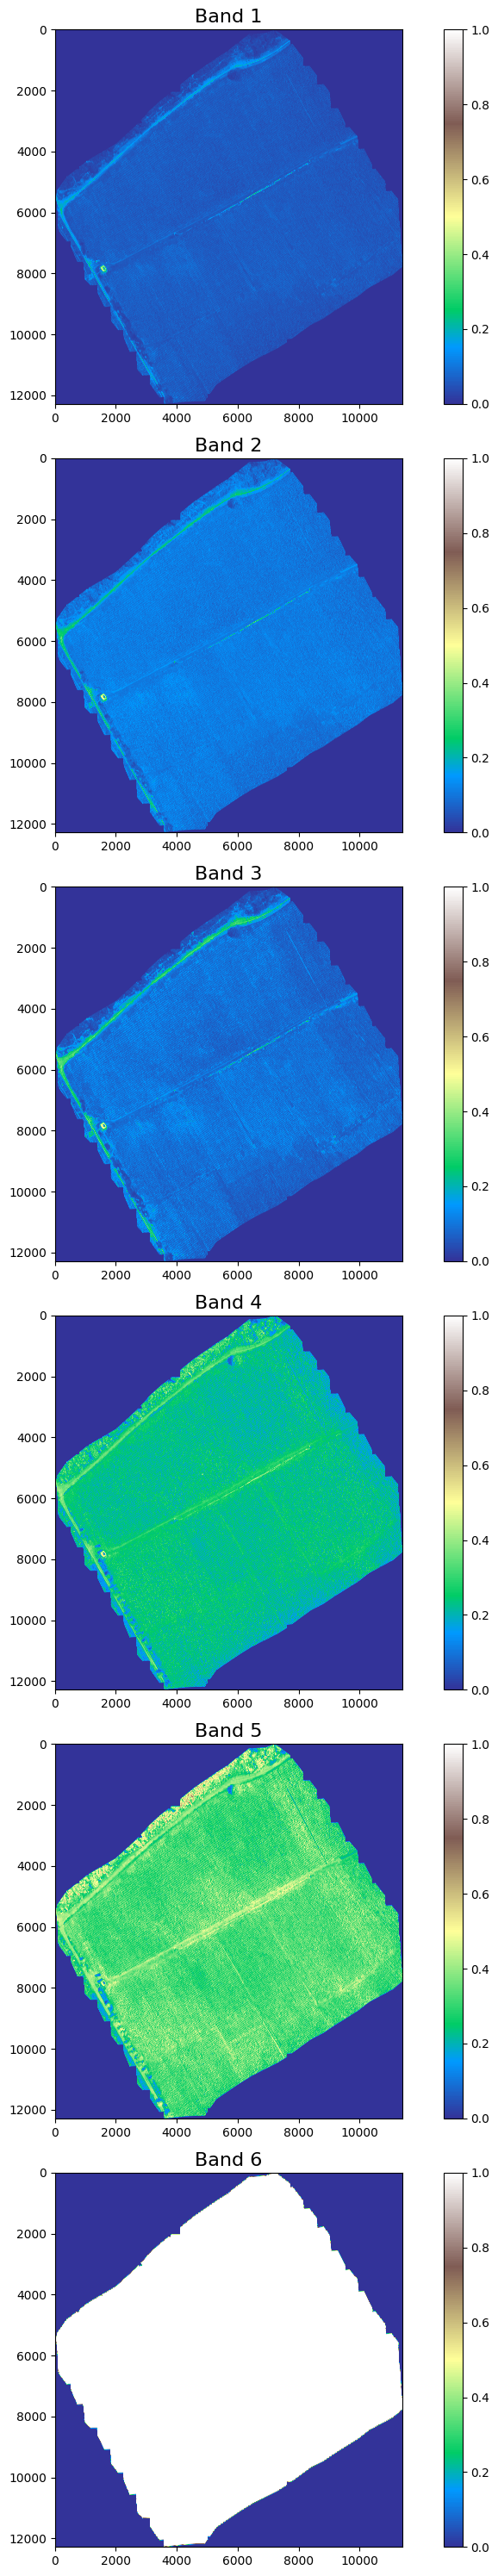

In [ ]:
# It seems your raster has a nodata value of -10000, let's fix that first
raster_block[raster_block == -10000] = np.nan

# Then, normalize bands to 0-1 range
for b in range(raster_block.shape[0]):
    band = raster_block[b, :, :]
    band_min, band_max = np.nanmin(band), np.nanmax(band)
    raster_block[b, :, :] = (band - band_min) / (band_max - band_min)
    raster_block[np.isnan(raster_block)] = 0 # replacing NaN values with 0

fig, axs = plt.subplots(raster_block.shape[0], 1, figsize=(10,raster_block.shape[0]*5))

for i in range(raster_block.shape[0]):
    # plotting the image
    im = axs[i].imshow(raster_block[i, :, :], cmap='terrain')

    # adding colorbar to each subplot
    fig.colorbar(im, ax=axs[i])

    # adding title to each subplot
    axs[i].set_title(f'Band {i + 1}', fontsize=16)

plt.tight_layout()
plt.show()


# Create a new raster dataset
new_dataset = rasterio.open('all.tif', 'w', driver='GTiff',
                            height=raster_block.shape[1], width=raster_block.shape[2],
                            count=raster_block.shape[0], dtype=str(raster_block.dtype),
                            crs=raster_blockk.crs, transform=raster_blockk.transform)

# Write the array to the raster band of the new dataset
for i in range(raster_block.shape[0]):
    new_dataset.write(raster_block[i,:,:], i+1)

# Save the filled raster to disk
new_dataset.close()

In [ ]:
# Create a new raster dataset
new_dataset = rasterio.open('all.tif', 'w', driver='GTiff',
                            height=raster_block.shape[1], width=raster_block.shape[2],
                            count=raster_block.shape[0], dtype=str(raster_block.dtype),
                            crs=raster_blockk.crs, transform=raster_blockk.transform)

# Write the array to the raster band of the new dataset
for i in range(raster_block.shape[0]):
    new_dataset.write(raster_block[i,:,:], i+1)

# Save the filled raster to disk
new_dataset.close()

In [5]:
# train_loader, val_loader, test_loader, train_dataset, val_dataset, test_dataset = get_dataloaders(df, batch_size=32)

# # Get the labels
# labels = []
# for i in range(len(test_dataset)):
#     labels.append(test_dataset[i][1])

# # Convert to numpy array
# labels = np.array(labels)

# # plot the bar plot
# unique, counts = np.unique(labels, return_counts=True)
# plt.bar(unique, counts)
# plt.title('Class Frequency')
# plt.xlabel('Class')
# plt.ylabel('Frequency')
# plt.show()

# print("total number of samples in test set: ", len(train_dataset))

In [ ]:
# Metrics
# # model = torch.load('model.pth')
# #load model
# # device = 'cuda' if torch.cuda.is_available() else 'cpu'
# import torch
# device = torch.device("mps")
# label_to_class = ['HW_HN', 'HW_LN', 'HW_MN', 'LW_HN', 'LW_LN', 'LW_MN', 'MW_HN', 'MW_LN', 'MW_MN']

# model = model1(channels=3, size=sizeOfPatch, device=device, batch_size=32)
# model.to(device)

# if torch.cuda.is_available():
#     model.load_state_dict(torch.load('/content/drive/MyDrive/IGLC_Capstone/runs/modelfliprotint5bandstr0.35prob0.6 (1).pt'))
# else:
#     model.load_state_dict(torch.load('/content/drive/MyDrive/IGLC_Capstone/runs/modelfliprotint5bandstr0.35prob0.6 (1).pt', map_location=device))

# model.eval()

# predicted_list = []
# actual_list = []
# correct_predictions_test = 0
# correct_images = []
# incorrect_images = []
# incorrect_count = 0
# correct_count = 0



# with torch.no_grad():
#     for imgs, labels in test_loader:
#         actual_list.append(labels)
#         imgs = imgs.to(device)  # Move images to GPU
#         labels = labels.to(device)  # Move labels to GPU



#         preds = model(imgs)
#         _, predicted = torch.max(preds.data, 1)
#         predicted_list.append(predicted)
#         correct_predictions_test += (predicted == labels).sum().item()



#         # Check if the current image was classified correctly
#         if predicted == labels:
#             if correct_count < 5:
#                 correct_images.append((imgs, labels, predicted))
#                 correct_count += 1
#         else:
#             if incorrect_count < 5:
#                 incorrect_images.append((imgs, labels, predicted))
#                 incorrect_count += 1



# # Calculate test accuracy
# test_acc = correct_predictions_test / len(test_loader.dataset)
# print('Test Accuracy: {:.4f}'.format(test_acc))



# # Print the number of correctly and incorrectly classified images
# print(f'Correctly classified images: {correct_count}')
# print(f'Incorrectly classified images: {incorrect_count}')
# #import classification_report
# from sklearn.metrics import classification_report, confusion_matrix
# list_pred =  [x.item() for x in predicted_list]
# gt_list =  [x.item() for x in actual_list]
# from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
# print(classification_report(gt_list,list_pred,labels=[0,1,2,3,4,5,6,7,8]))

# cm=confusion_matrix(gt_list,list_pred,labels=[0,1,2,3,4,5,6,7,8])

# import seaborn as sns
# import matplotlib.pyplot as plt


# plt.figure(figsize=(10, 7))  # adjust for your needs
# #normalise the confusion matrix
# cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=label_to_class, yticklabels=label_to_class)
# plt.title('Confusion matrix')
# plt.xlabel('Predicted label')
# plt.ylabel('True label')

# plt.show()


In [ ]:
label_to_class = ['HW_HN', 'HW_LN', 'HW_MN', 'LW_HN', 'LW_LN', 'LW_MN', 'MW_HN', 'MW_LN', 'MW_MN']
sizeOfPatch = 32
# device = torch.device("mps")
# model = model1(channels=7, size=sizeOfPatch, device=device, batch_size=32)
# model.to(device)


# model.load_state_dict(torch.load('/content/drive/MyDrive/IGLC_Capstone/runs/modelfliprotint5bandstr0.35prob0.6 (1).pt', map_location=device))

# model.eval()

In [ ]:
color_mapping = {
    '0': [255, 255, 255],
    '1': [128, 255, 255],
    '2': [0, 255, 255],
    '3': [255, 128, 128],
    '4': [128, 128, 128],
    '5': [0, 128, 128],
    '6': [255, 0, 0],
    '7': [128, 0, 0],
    '8': [0, 0, 0]
}
import tqdm


def get_patches_from_raster(raster, window_size=(32,32)):
    raster_array = np.array(raster)
    empty_arr = np.zeros((raster_array.shape[0], raster_array.shape[1], 3), dtype=np.float32) #assuming color codes are float32
    color_grid = np.zeros((raster_array.shape[0], raster_array.shape[1]), dtype=np.float32) #assuming color codes are float32
    for i in tqdm.tqdm(range(0, raster_array.shape[0], window_size[0])):
        for j in range(0, raster_array.shape[1], window_size[1]):
            patch = raster_array[i:i+window_size[0], j:j+window_size[1]]
            if patch.shape[:2] == window_size:
                #normalise patch
                # patch = patch/255
                color_rgb, color_code = color_code_raster(patch)

                r = color_rgb[0]
                g = color_rgb[1]
                b = color_rgb[2]
                color_grid[i:i+window_size[0], j:j+window_size[1]] = color_code
                empty_arr[i:i+window_size[0], j:j+window_size[1], 0] = r
                empty_arr[i:i+window_size[0], j:j+window_size[1], 1] = g
                empty_arr[i:i+window_size[0], j:j+window_size[1], 2] = b

                # print(empty_arr[i:i+window_size[0], j:j+window_size[1], :])

    return empty_arr, color_grid # return the array with the classification results


def color_code_raster(patch):
    with torch.no_grad():
        color_code = model(torch.tensor(patch).permute(2, 0, 1).unsqueeze(0).float().to("mps"))
        # print(color_code)
        color_code = torch.argmax(color_code, axis=1)
        color_code = color_code.detach().cpu().numpy() # moving tensor back to CPU before converting to numpy

    return color_mapping[str(color_code[0])], color_code[0]


In [ ]:
block_list = ['B1_P1', 'B1_P2', 'B1_P3', 'B1_P4', 'B1_Y1', 'B1_Y2', 'B1_Y3',
       'B1_Y4', 'B1_R1', 'B1_R2', 'B1_R3', 'B1_R4', 'B2_P1', 'B2_P2',
       'B2_P3', 'B2_P4', 'B2_P5', 'B2_Y1', 'B2_Y1a', 'B2_Y2', 'B2_Y2a',
       'B2_Y3', 'B2_Y3a', 'B2_Y4', 'B2_Y4a', 'B2_Y5', 'B2_Y5a', 'B2_R1',
       'B2_R1a', 'B2_R2', 'B2_R2a', 'B2_R3', 'B2_R3a', 'B2_R4', 'B2_R4a',
       'B2_R5', 'B2_R5a', 'B3_P1', 'B3_P2', 'B3_P3', 'B3_P4', 'B3_P5',
       'B3_Y1', 'B3_Y1a', 'B3_Y2', 'B3_Y2a', 'B3_Y3', 'B3_Y3a', 'B3_Y4',
       'B3_Y4a', 'B3_Y5', 'B3_Y5a', 'B3_R1', 'B3_R1a', 'B3_R2', 'B3_R2a',
       'B3_R3', 'B3_R3a', 'B3_R4', 'B3_R4a', 'B3_R5', 'B3_R5a']
# raster = result
block_list_type = {'B1_P1': 'HW_LN',
       'B1_P2': 'HW_LN',
       'B1_P3': 'HW_LN',
       'B1_P4': 'HW_LN',
       'B1_Y1': 'HW_MN',
       'B1_Y2': 'HW_MN',
       'B1_Y3': 'HW_MN',
       'B1_Y4': 'HW_MN',
       'B1_R1': 'HW_HN',
       'B1_R2': 'HW_HN',
       'B1_R3': 'HW_HN',
       'B1_R4': 'HW_HN',
       'B2_P1': 'MW_LN',
       'B2_P2': 'MW_LN',
       'B2_P3': 'MW_LN',
       'B2_P4': 'MW_LN',
       'B2_P5': 'MW_LN',
       'B2_Y1': 'MW_MN',
       'B2_Y1a': 'MW_MN',
       'B2_Y2': 'MW_MN',
       'B2_Y2a': 'MW_MN',
       'B2_Y3': 'MW_MN',
       'B2_Y3a': 'MW_MN',
       'B2_Y4': 'MW_MN',
       'B2_Y4a': 'MW_MN',
       'B2_Y5': 'MW_MN',
       'B2_Y5a': 'MW_MN',
       'B2_R1': 'MW_HN',
       'B2_R1a': 'MW_HN',
       'B2_R2': 'MW_HN',
       'B2_R2a': 'MW_HN',
       'B2_R3': 'MW_HN',
       'B2_R3a': 'MW_HN',
       'B2_R4': 'MW_HN',
       'B2_R4a': 'MW_HN',
       'B2_R5': 'MW_HN',
       'B2_R5a': 'MW_HN',
       'B3_P1': 'LW_LN',
       'B3_P2': 'LW_LN',
       'B3_P3': 'LW_LN',
       'B3_P4': 'LW_LN',
       'B3_P5': 'LW_LN',
       'B3_Y1': 'LW_MN',
       'B3_Y1a': 'LW_MN',
       'B3_Y2': 'LW_MN',
       'B3_Y2a': 'LW_MN',
       'B3_Y3': 'LW_MN',
       'B3_Y3a': 'LW_MN',
       'B3_Y4': 'LW_MN',
       'B3_Y4a': 'LW_MN',
       'B3_Y5': 'LW_MN',
       'B3_Y5a': 'LW_MN',
       'B3_R1': 'LW_HN',
       'B3_R1a': 'LW_HN',
       'B3_R2': 'LW_HN',
       'B3_R2a': 'LW_HN',
       'B3_R3': 'LW_HN',
       'B3_R3a': 'LW_HN',
       'B3_R4': 'LW_HN',
       'B3_R4a': 'LW_HN',
       'B3_R5': 'LW_HN',
       'B3_R5a': 'LW_HN'}

In [4]:
# def plot_raster(coded_raster, name, block_type):
#     import numpy as np
#     import matplotlib.pyplot as plt
#     from matplotlib.colors import ListedColormap


#     # Create a color map with 9 distinct colors.
#     colors = ["#FFA500", "#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#00FFFF", "#FF00FF", "#808080", "#FFFFFF"]  # these are just example colors
#     cmap = ListedColormap(colors)
#     plt.figure(figsize=(10, 7))  # adjust for your needs
#     plt.imshow(coded_raster, cmap=cmap)
#     plt.title('Trying to predict for Block: {} ({})'.format(name, block_type))
#     cbar = plt.colorbar()
#     cbar.set_label('Label')
#     cbar.set_ticks([0,1,2,3,4,5,6,7,8])
#     cbar.set_ticklabels(['HW_HN', 'HW_LN', 'HW_MN', 'LW_HN', 'LW_LN', 'LW_MN', 'MW_HN', 'MW_LN', 'MW_MN'])



#     plt.show()

# for i in block_list:
#     # raster = vikram_farm.get_block_by_name(i).get_modality(modality_type='drone_37',timestamp='22/06/23')
#     raster = vikram_farm.get_modality(modality_type='drone_37',timestamp='22/06/23')
#     block_type = df[df['block'] == i]['name'].values[0]
#     block = raster.read()
#     block[block == -10000] = 0
#     scaled_data = min_max_scale(block[:6,:,:], min_values, max_values, user_min_value, user_max_value)
#     raster = calculate_indices(scaled_data)

#     # raster = raster.read([1,2,3])
#     raster = raster.transpose(1,2,0)
#     print(raster.shape)
#     colored_raster, coded_raster = get_patches_from_raster(raster)
#     plot_raster(coded_raster, i, block_type)
#     # break


In [ ]:
mins = df['chip'].apply(lambda x: x.min(axis=(1,2)))
means = df['chip'].apply(lambda x: x.mean(axis=(1,2)))
maxs = df['chip'].apply(lambda x: x.max(axis=(1,2)))
vars = df['chip'].apply(lambda x: x.flatten().var())
mins.shape

(202849,)

In [ ]:
df['chip'] = df['chip'].apply(lambda x: 0 if x.all() == -10000 else x)
min_values = []
mean_values = []
max_values = []

for _, row in df.iterrows():
    chip_data = row['chip']
    min_values.append(chip_data.min(axis=(1,2)))
    mean_values.append(chip_data.mean(axis=(1,2)))
    max_values.append(chip_data.max(axis=(1,2)))

In [ ]:
min5band = np.array(min_values).min(0)
max5band = np.array(max_values).max(0)

In [ ]:
#Scale each band separately
def min_max_scale(array, min_values, max_values, scaled_min, scaled_max):
    scaled_array = np.empty_like(array)
    for i in range(array.shape[0]):
        scaled_array[i,:,:] = (array[i,:,:] - min_values[i]) / (max_values[i] - min_values[i]) * (scaled_max - scaled_min) + scaled_min
        #round off array to 3 decimal point
        scaled_array[i,:,:] = np.around(scaled_array[i,:,:], decimals=3)
    return scaled_array

user_max_value = 1
user_min_value = 0
df['nchip'] = df['chip'].apply(min_max_scale, args=(min5band, max5band, user_min_value, user_max_value))

In [ ]:
# Load your data
# df = pd.read_csv('your_file.csv')
# df=data5band
# Example function to calculate indices
def sub_chip_mean(chip, sub_chip_size):
    # Check if chip size is divisible by sub chip size
    if chip.shape[0] % sub_chip_size != 0 or chip.shape[1] % sub_chip_size != 0:
        raise ValueError(f"Chip dimensions {chip.shape} must be divisible by sub chip size {sub_chip_size}")

    # Reshape the chip and find the mean across the new dimensions
    chip_reshaped = chip.reshape(chip.shape[0]//sub_chip_size, sub_chip_size,
                                 chip.shape[1]//sub_chip_size, sub_chip_size)

    sub_chip_means = chip_reshaped.mean(axis=(1,3))

    return sub_chip_means
def calculate_indices(chip):
    # Assuming chip is a NumPy array and you know which bands correspond to Red, Green, Blue, NIR etc.
    # You need to adjust the indices [0], [1], etc., based on your data's structure.
    red = chip[2, :, :]   # Update indices based on your data's band order
    green = chip[1, :, :]
    blue = chip[0, :, :]
    nir = chip[4, :, :]    # This is an assumption; your actual NIR band's position might differ
    re = chip[3,:,:]
    # print(nir.shape)
    mean = np.mean(chip)
    variance = np.var(chip)
    gli = (2 * green - red - blue) / (2 * green + red + blue)
    # print(gli.shape)
    ndvi = (nir - red) / (nir + red)
    # print(ndvi.shape)
    # Calculate mean of sub-chips
    # means_found = sub_chip_mean(red, 8)
    # print(means_found)
    # means = means_found.reshape(-1)
    # print(means)
    # Calculate mean of GLI and NDVI if they're per pixel
    gli_mean = np.mean(gli)
    ndvi_mean = np.mean(ndvi)
    # print(red.shape)
    # hstacked = np.array([red, green, blue, nir, gli, ndvi])
    hstacked = np.array([red, green, blue, re, nir, gli, ndvi])
    # print(hstacked.shape)
    return hstacked

df['indices'] = None
chip_shape = df['nchip'][0].shape  # Get the shape of a sample chip
num_means = (chip_shape[1] // 8) * (chip_shape[2] // 8)  # Calculate based on sub_chip_size

# Create columns for the means based on the calculated number
for i in range(num_means):
    df[f'Mean{i}'] = None
import tqdm
# Apply the function to each chip
for index, row in tqdm.tqdm(df.iterrows()):
    chip = row['nchip']  # Be cautious with 'eval'; ensure data is safe to evaluate
    hstacked = calculate_indices(chip)
    # Store these values back in the dataframe or handle them as needed
    df.at[index, 'indices'] = hstacked
    #here means is a list of means of sub-chips
    # for i in range(min(len(means), num_means)):
    #     df.at[index, 'Mean'+str(i)] = means[i]
    means_found = sub_chip_mean(chip[2, :, :], 8)
    means = means_found.reshape(-1)
    for i, mean_value in enumerate(means):
        df.at[index, f'Mean{i}'] = mean_value
    # mean, variance, gli, ndvi = calculate_indices(chip)
    # # Store these values back in the dataframe or handle them as needed
    # df.at[index, 'Mean'] = mean
    # df.at[index, 'Variance'] = variance
    # df.at[index, 'GLI'] = gli
    # df.at[index, 'NDVI'] = ndvi

calculate_indices(df['nchip'][0])

In [ ]:
# df['indices'][0].shape
# df.type.value_counts()
df.Mean15.iloc[0]

0.15721877

In [ ]:
# Function to calculate mean and variance of RGB
def calc_mean_variance(chip):
    all_colors = np.array([item for sublist in chip for item in sublist])
    mean_values = np.mean(all_colors, axis=0)
    var_values = np.var(all_colors, axis=0)

    # Calculate the mean of the means and variances for R, G, B
    mean = np.mean(mean_values)
    variance = np.mean(var_values)
    return mean, variance

# Function to calculate GLI index from RGB
def calc_gli(chip):
    # Assuming the order of colors is R, G, B
    red = np.array([color[0] for color in chip])
    green = np.array([color[1] for color in chip])
    blue = np.array([color[2] for color in chip])

    gli = (2 * green - red - blue) / (2 * green + red + blue)
    # ndvi = (nir - red) / (nir + red)

    return np.mean(gli), np.var(gli)

# Assuming 'df' is your DataFrame
# Create new columns in the DataFrame
df['RGB_mean'] = np.nan
df['RGB_variance'] = np.nan
df['GLI_mean'] = np.nan
df['GLI_variance'] = np.nan

# Calculate values for each row
for index, row in df.iterrows():
    chip_data = row['chip']  # Extract the 'chip' data

    mean, variance = calc_mean_variance(chip_data)
    gli_mean, gli_variance = calc_gli(chip_data)

    # Assign the results to new columns in your DataFrame
    df.at[index, 'RGB_mean'] = mean
    df.at[index, 'RGB_variance'] = variance
    df.at[index, 'GLI_mean'] = gli_mean
    df.at[index, 'GLI_variance'] = gli_variance

# Display the updated DataFrame
df

,type,chip_cord_0,chip_cord_1,chip_cord_2,chip_cord_3,block,chip,name,type_name,nchip,...,Mean10,Mean11,Mean12,Mean13,Mean14,Mean15,RGB_mean,RGB_variance,GLI_mean,GLI_variance
0,1,22,54,396,428,B1_P1,"[[[0.023026599, 0.0249754, 0.026247537, 0.0260...",HW_LN,HW_LN,"[[[0.33, 0.367, 0.391, 0.387, 0.356, 0.306, 0....",...,0.193484,0.300203,0.221656,0.303453,0.198375,0.157219,0.057972,0.001222,0.001746,0.000082
1,1,22,54,407,439,B1_P1,"[[[0.016220052, 0.017935053, 0.017924514, 0.01...",HW_LN,HW_LN,"[[[0.202, 0.234, 0.234, 0.216, 0.196, 0.183, 0...",...,0.327891,0.408359,0.286047,0.143844,0.202656,0.307969,0.058821,0.001169,0.003233,0.000127
2,1,22,54,418,450,B1_P1,"[[[0.02027587, 0.021329222, 0.021899527, 0.021...",HW_LN,HW_LN,"[[[0.278, 0.298, 0.309, 0.31, 0.296, 0.299, 0....",...,0.419797,0.275063,0.132359,0.248437,0.354625,0.346563,0.057896,0.001011,0.004215,0.000154
3,1,33,65,385,417,B1_P1,"[[[0.016656933, 0.020719536, 0.024053702, 0.02...",HW_LN,HW_LN,"[[[0.21, 0.287, 0.35, 0.349, 0.357, 0.356, 0.3...",...,0.278344,0.260609,0.205422,0.213906,0.246234,0.281922,0.056785,0.001307,-0.002136,0.000126
4,1,33,65,396,428,B1_P1,"[[[0.02388704, 0.025690503, 0.028464105, 0.026...",HW_LN,HW_LN,"[[[0.346, 0.381, 0.433, 0.397, 0.35, 0.322, 0....",...,0.205422,0.134484,0.230234,0.257359,0.294281,0.239922,0.057325,0.001291,-0.003554,0.000138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202844,3,847,879,286,318,B3_R5a,"[[[0.017104346, 0.01764413, 0.017523725, 0.019...",LW_HN,LW_HN,"[[[0.218, 0.228, 0.226, 0.267, 0.349, 0.414, 0...",...,0.165875,0.155406,0.291984,0.384031,0.220016,0.115578,0.058236,0.001317,-0.002021,0.000120
202845,3,847,879,297,329,B3_R5a,"[[[0.013357418, 0.013811426, 0.014541717, 0.01...",LW_HN,LW_HN,"[[[0.147, 0.156, 0.17, 0.202, 0.229, 0.201, 0....",...,0.192938,0.22075,0.343328,0.152938,0.125375,0.173078,0.060035,0.001561,-0.002163,0.000211
202846,3,858,890,253,285,B3_R5a,"[[[0.028795283, 0.029243596, 0.027230985, 0.02...",LW_HN,LW_HN,"[[[0.439, 0.448, 0.41, 0.374, 0.35, 0.305, 0.2...",...,0.127687,0.176156,0.392063,0.305875,0.206922,0.107625,0.057261,0.001272,-0.000340,0.000243
202847,3,858,890,264,296,B3_R5a,"[[[0.016575634, 0.015353283, 0.01620938, 0.017...",LW_HN,LW_HN,"[[[0.208, 0.185, 0.201, 0.222, 0.224, 0.25, 0....",...,0.241063,0.274687,0.284922,0.136031,0.133062,0.252797,0.058697,0.001433,0.002628,0.000181


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # or RandomForestRegressor
from sklearn.metrics import accuracy_score  # or other relevant metrics

# Assume 'target' is your target variable. Replace it with your actual target column name
target = 'type'

# Prepare the dataset
# X = df[['Mean', 'Variance', 'GLI', 'NDVI']]#,
# X = df[['Variance','GLI','NDVI','Mean0', 'Mean1', 'Mean2', 'Mean3', 'Mean4', 'Mean5', 'Mean6', 'Mean7', 'Mean8', 'Mean9', 'Mean10', 'Mean11', 'Mean12', 'Mean13', 'Mean14', 'Mean15']]
X = df[['GLI_mean', 'GLI_variance', 'RGB_variance', 'RGB_mean', 'Mean0', 'Mean1', 'Mean2', 'Mean3', 'Mean4', 'Mean5', 'Mean6', 'Mean7', 'Mean8', 'Mean9', 'Mean10', 'Mean11', 'Mean12', 'Mean13', 'Mean14', 'Mean15']]
y = df[target]

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)  # Use RandomForestRegressor for regression tasks
model.fit(X_train, y_train)

# Predict and evaluate the model
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.28382220031221755


In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define your parameter space
param_grid = {
    'n_estimators': [100, 300, 500, 700],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a base model
rf = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                           cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Determine the best parameters
best_params = grid_search.best_params_
print("Best parameters: ", best_params)

# Predict and evaluate the best model
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy}")

Fitting 3 folds for each of 288 candidates, totalling 864 fits


In [ ]:
import pickle

# Save the model to a file
with open('/content/drive/MyDrive/IGLC_Capstone/best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)


In [2]:
# data = pd.read_hdf('./cache/df_32_1000_0.27.h5', 'df')
# data = pd.read_hdf('/content/drive/MyDrive/IGLC_Capstone/cache/df_size32_samples100000_sr0.35_bands_5.h5', 'df')
# data2 = pd.read_hdf('/cache/df_size32_samples100000_sr0.35_bands_5.h5', 'df')
# df2 = pd.read_csv('/content/drive/MyDrive/PlakshaCapstone/data/block.csv')

In [ ]:
train_loader, val_loader, test_loader, train_dataset, val_dataset, test_dataset = get_dataloaders(data, batch_size=32, val_size=0.2, test_size=0.1, acc = "mps", transform_flag=True, probability=0.5)

Using device: mps


In [1]:
# import matplotlib.pyplot as plt
# a = next(iter(val_loader))[0].numpy().squeeze(0).transpose(1,2,0)
# plt.imshow(a)

In [3]:
# model = model1(channels=3, size=sizeOfPatch, device='mps', batch_size=300)

In [ ]:
train(model, train_loader, val_loader, num_epochs=50, lr=0.001, device='mps')

In [ ]:
import h5py
f = h5py.File('/content/drive/MyDrive/IGLC_Capstone/cache/df_size32_samples100000_sr0.35_bands_5.h5', 'r')
data = f['df']
data = pd.DataFrame(df)

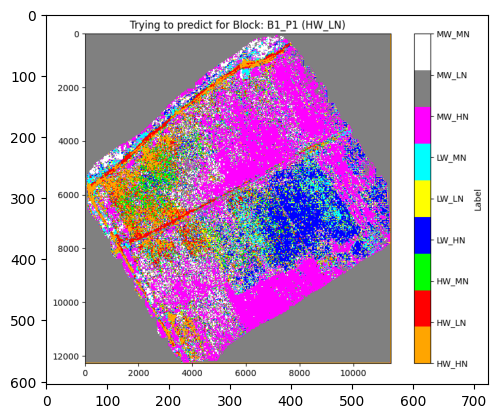

In [12]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from matplotlib.patches import Polygon
# from matplotlib.collections import PatchCollection
# import joblib
# import numpy as np

# # Create a figure and axis
# fig, ax = plt.subplots(figsize=(10, 10))

# coordinates = df[['chip_cord_0', 'chip_cord_1', 'chip_cord_2', 'chip_cord_3']]

# # Create polygons and add them to the plot with colors based on predictions
# patches = []
# colors = predictions
# for i, row in coordinates.iterrows():
#     polygon_coords = [(row['chip_cord_0'], row['chip_cord_1']),
#                       (row['chip_cord_2'], row['chip_cord_1']),
#                       (row['chip_cord_2'], row['chip_cord_3']),
#                       (row['chip_cord_0'], row['chip_cord_3'])]
#     polygon = Polygon(polygon_coords, closed=True)
#     patches.append(polygon)

# # Create a PatchCollection with the polygons
# p = PatchCollection(patches, cmap='viridis', edgecolor='k', alpha=0.4)
# p.set_array(np.array(colors))
# ax.add_collection(p)

# # Add a colorbar
# plt.colorbar(p, label='Class')

# # Add labels and title
# plt.xlabel('X Coordinate')
# plt.ylabel('Y Coordinate')
# plt.title('Polygon Classification')

# # Show plot
# plt.show()

In [ ]:
# import geopandas as gpd
# import matplotlib.pyplot as plt
# import rasterio
# from rasterio.plot import show
# from shapely.geometry import Polygon
# import pandas as pd

# # Load the TIFF image
# tiff_image_path = '/content/drive/MyDrive/11.tif'
# src = rasterio.open(tiff_image_path)

# # Load the dataset (assuming it is in CSV format)
# # data = pd.read_csv('path_to_dataset.csv')

# # Create a GeoDataFrame to hold the polygons
# polygons = []
# for idx, row in df.iterrows():
#     coords = [
#         (row['chip_cord_0'], row['chip_cord_1']),
#         (row['chip_cord_2'], row['chip_cord_1']),
#         (row['chip_cord_2'], row['chip_cord_3']),
#         (row['chip_cord_0'], row['chip_cord_3'])
#     ]
#     polygon = Polygon(coords)
#     polygons.append(polygon)

# gdf = gpd.GeoDataFrame(df, geometry=polygons)

# # Plot the TIFF image
# fig, ax = plt.subplots(figsize=(10, 10))
# show(src, ax=ax)

# # Overlay the polygons on the TIFF image
# gdf.plot(column='type', ax=ax, alpha=0.5, edgecolor='k', legend=True, cmap='viridis')

# # Set plot title and labels
# plt.title('Polygon Classification Overlaid on TIFF Image')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')

# plt.show()


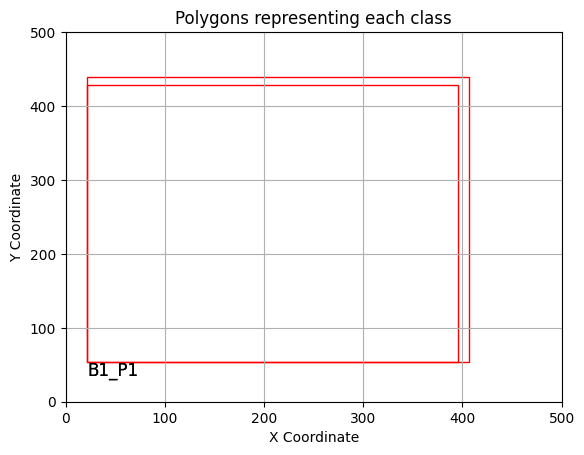

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    'chip_cord_0': [22, 22],
    'chip_cord_1': [54, 54],
    'chip_cord_2': [396, 407],
    'chip_cord_3': [428, 439],
    'class': ['B1_P1', 'B1_P1']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Function to plot polygons
def plot_polygons(df):
    fig, ax = plt.subplots()

    for i, row in df.iterrows():
        coords = [(row['chip_cord_0'], row['chip_cord_1']),
                  (row['chip_cord_0'], row['chip_cord_3']),
                  (row['chip_cord_2'], row['chip_cord_3']),
                  (row['chip_cord_2'], row['chip_cord_1'])]

        polygon = plt.Polygon(coords, closed=True, fill=None, edgecolor='r')
        ax.add_patch(polygon)
        plt.text(row['chip_cord_0'], row['chip_cord_1'], row['class'], fontsize=12, verticalalignment='top')

    ax.set_xlim(0, 500)
    ax.set_ylim(0, 500)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Polygons representing each class')
    plt.grid(True)
    plt.show()

# Plot the polygons
plot_polygons(df)
